Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing Skin Cancer Data

## To do: Take necessary actions to read the data

Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive

In [2]:
# Defining the path for train and test images
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Setting the path for test and train datasets
data_dir_train = pathlib.Path("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
# Printing the path for the train and test folders
print(data_dir_train)
print(data_dir_test)

/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [5]:
# Get the count of images foir both train and test datasets
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_train)
print(image_count_test)

2239
118


In [6]:
# Setting image height width and batch size for processing
batch_size = 32  # Thisis a default  batch size used
img_height = 180
img_width = 180

In [7]:
## Train Datasaet
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**

Todo, create a code to visualize one instance of all the nine classes present in the dataset




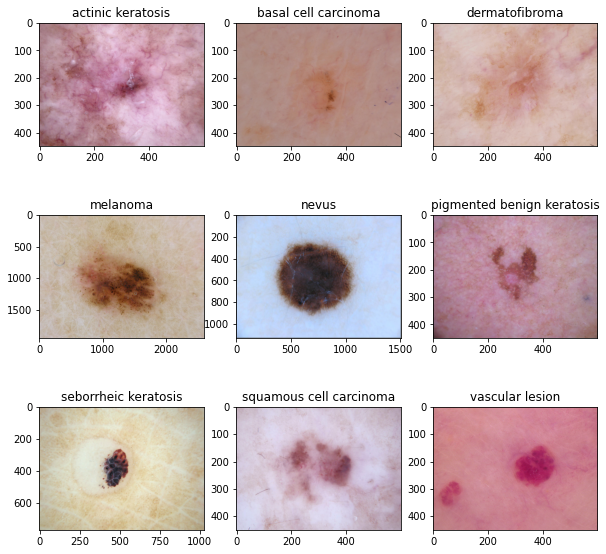

In [10]:
# Display the classes
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The image_batch is a tensor of the shape (32, 180, 180, 3). 

This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 
The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [12]:
### Your code goes here
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, LeakyReLU
num_classes = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      12832     
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0

**Train the model**

In [15]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 357s 1s/step - loss: 2.5111 - accuracy: 0.3387 - val_loss: 2.5876 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 78ms/step - loss: 1.8381 - accuracy: 0.4319 - val_loss: 2.6611 - val_accuracy: 0.1544
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 1.7085 - accuracy: 0.4710 - val_loss: 2.1340 - val_accuracy: 0.2416
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 1.5922 - accuracy: 0.4950 - val_loss: 2.6367 - val_accuracy: 0.1633
Epoch 5/20
56/56 [==============================] - 4s 78ms/step - loss: 1.4772 - accuracy: 0.5151 - val_loss: 2.3574 - val_accuracy: 0.2953
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.5077 - accuracy: 0.5285 - val_loss: 2.6811 - val_accuracy: 0.3714
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 1.4069 - accuracy: 0.5419 - val_loss: 1.7918 - val_accuracy: 0.3781
Epoch 8/20
56/56 [======

**Visualizing training results**

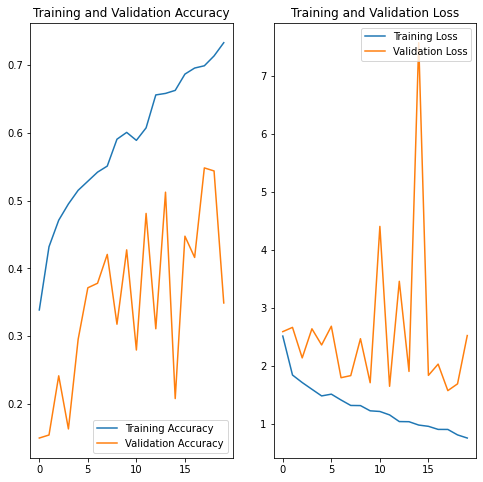

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Finding on the first base model

The model is overfitting because we can also see difference in loss functions in training & test

The accuracy is just around 75-80% because there are enough features to remember the pattern.

But again, it's too early to comment on the overfitting & underfitting debate

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = tf.keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(factor=0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

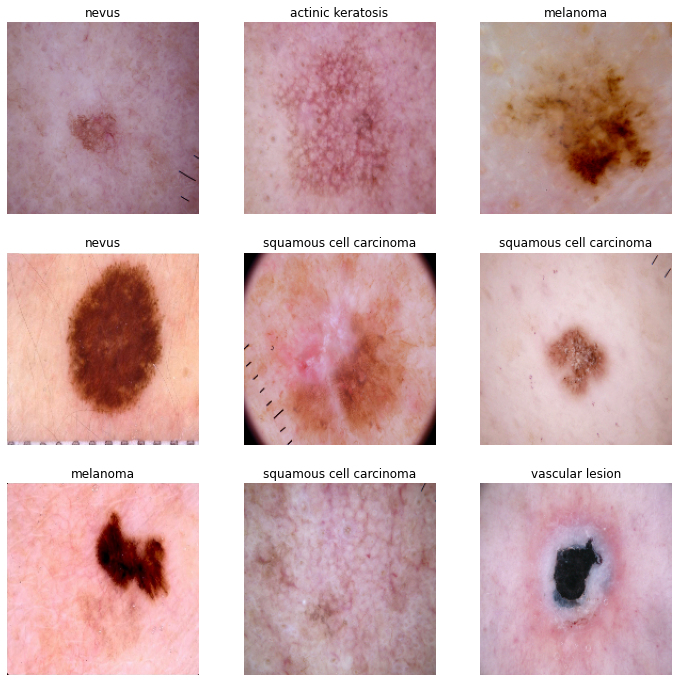

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Todo:
Create the model, compile and train the model

In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



**Compiling the model**

In [20]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# Note:- Tried a lot, but could not  make the  model more  accurate, please suggest, how it could have been done better, in feedback.

Epoch 1/20
56/56 [==============================] - 17s 218ms/step - loss: 12.5984 - accuracy: 0.2573 - val_loss: 2.3808 - val_accuracy: 0.0962
Epoch 2/20
56/56 [==============================] - 9s 169ms/step - loss: 3.6130 - accuracy: 0.3209 - val_loss: 3.9144 - val_accuracy: 0.0895
Epoch 3/20
56/56 [==============================] - 9s 169ms/step - loss: 1.7155 - accuracy: 0.4118 - val_loss: 2.6356 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 9s 169ms/step - loss: 1.5296 - accuracy: 0.4526 - val_loss: 3.9381 - val_accuracy: 0.1879
Epoch 5/20
56/56 [==============================] - 9s 170ms/step - loss: 1.4548 - accuracy: 0.4799 - val_loss: 1.9503 - val_accuracy: 0.2595
Epoch 6/20
56/56 [==============================] - 10s 171ms/step - loss: 1.4631 - accuracy: 0.4827 - val_loss: 1.9763 - val_accuracy: 0.2841
Epoch 7/20
56/56 [==============================] - 10s 170ms/step - loss: 1.4666 - accuracy: 0.4888 - val_loss: 1.9185 - val_accuracy: 0.3199
Ep

Visualizing the results

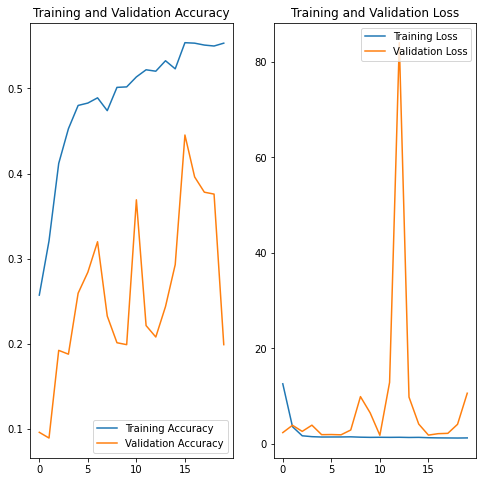

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Finding from Second Model

There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

We can increase the epochs to increase the accuracy so it's too early for judgement

Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
2235,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
2236,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
2237,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion


In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
2235,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
2236,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
2237,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion


<BarContainer object of 9 artists>

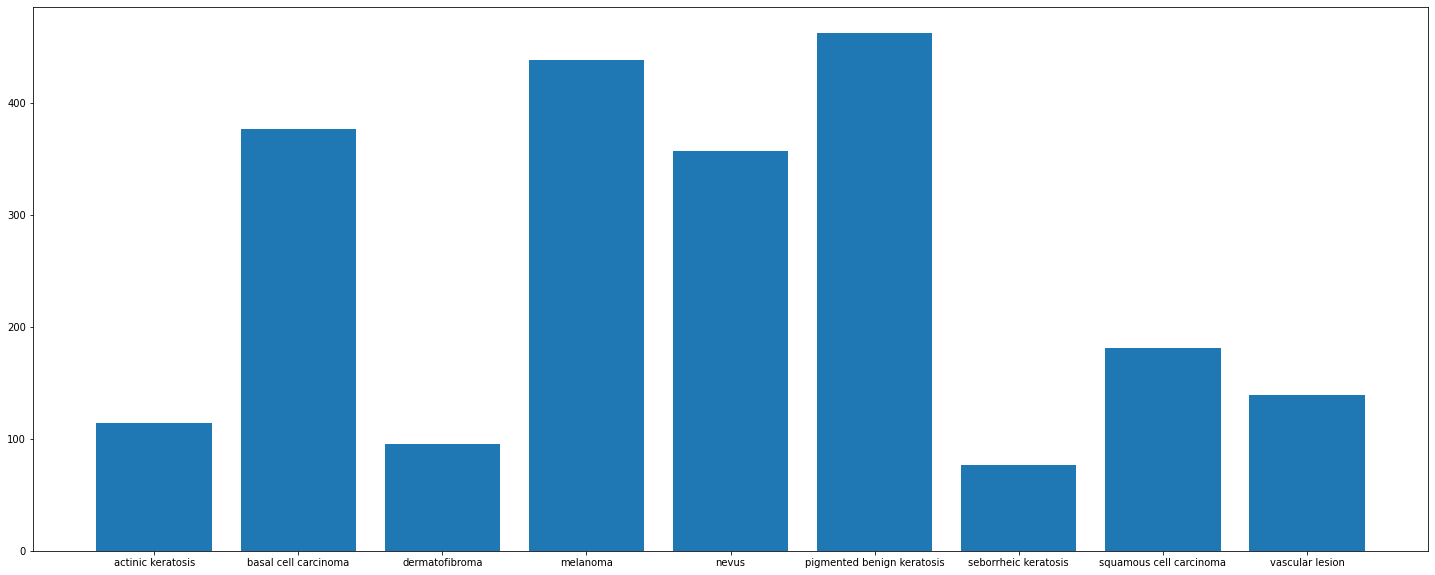

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- seborrheic keratosis has least number of samples

Answer-2:- actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train", save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBCEE034FD0>: 100%|██████████| 500/500 [00:47<00:00, 10.45 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCEE0F03D0>: 100%|██████████| 500/500 [00:49<00:00, 10.02 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FBCEA58D110>: 100%|██████████| 500/500 [00:44<00:00, 11.19 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBCEE0F1510>: 100%|██████████| 500/500 [00:52<00:00,  9.58 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FBCEE0F1650>: 100%|██████████| 500/500 [00:49<00:00, 10.12 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCEA5A2550>: 100%|██████████| 500/500 [01:00<00:00,  8.25 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCF0CB1B50>: 100%|██████████| 500/500 [00:46<00:00, 10.67 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCEF253810>: 100%|██████████| 500/500 [00:48<00:00, 10.22 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBCF13C5E90>: 100%|██████████| 500/500 [00:42<00:00, 11.76 Samples/s]


In [29]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)


4500


In [30]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Datasets/Skin cancer IS...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
6735,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
6736,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion
6737,/content/drive/MyDrive/Datasets/Skin cancer IS...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
new_df['Label'].value_counts()

melanoma                      1338
pigmented benign keratosis    1332
basal cell carcinoma          1131
nevus                         1068
squamous cell carcinoma        557
vascular lesion                455
actinic keratosis              348
dermatofibroma                 276
seborrheic keratosis           234
Name: Label, dtype: int64

So, now we have added images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Todo: Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

In [33]:
import pathlib
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")

In [34]:
data_dir_train1

PosixPath('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

Todo: Create a training dataset

In [35]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [36]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


Todo: Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


Todo: Create your model (make sure to include normalization)

In [56]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.6))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

Todo: Compile your model (Choose optimizer and loss function appropriately)

In [57]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
## Your code goes here, use 40 epochs.
epochs = 40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
113/113 [==============================] - 23s 187ms/step - loss: 2.5662 - accuracy: 0.3278 - val_loss: 2.5816 - val_accuracy: 0.1844
Epoch 2/40
113/113 [==============================] - 23s 193ms/step - loss: 1.8419 - accuracy: 0.4489 - val_loss: 3.1838 - val_accuracy: 0.1622
Epoch 3/40
113/113 [==============================] - 22s 183ms/step - loss: 1.7533 - accuracy: 0.4742 - val_loss: 1.8413 - val_accuracy: 0.3578
Epoch 4/40
113/113 [==============================] - 22s 184ms/step - loss: 1.6919 - accuracy: 0.4839 - val_loss: 1.9779 - val_accuracy: 0.3167
Epoch 5/40
113/113 [==============================] - 21s 182ms/step - loss: 1.6416 - accuracy: 0.5100 - val_loss: 11.1525 - val_accuracy: 0.2389
Epoch 6/40
113/113 [==============================] - 22s 183ms/step - loss: 1.5702 - accuracy: 0.5278 - val_loss: 7.8668 - val_accuracy: 0.2789
Epoch 7/40
113/113 [==============================] - 23s 192ms/step - loss: 1.4390 - accuracy: 0.5486 - val_loss: 1.3517 - val_a

Todo: Visualize the model results

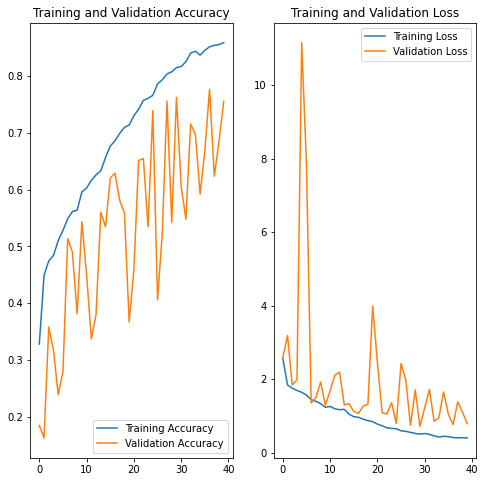

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

1. Accuracy on training data has increased by using Augmentor library

2. Thelatest Model is fitting better than the previous ones.

The Model can be further improved by tuning the hyperparameter